<a href="https://colab.research.google.com/github/adriellisantos/adriellisantos.github.io/blob/master/Fase_02_Tech_Challenge_Pos_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando dados

In [ ]:
#Realizando a importação das bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [ ]:
#Lendo o arquivo em csv e atribuindo para a variavel df
df = pd.read_csv("/content/dados_ibovespa.csv", parse_dates=["Data"], dayfirst=True)

In [ ]:
#Mostrando os primeiros dados do DataFrame df
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-03-17,130.901,128.959,131.313,128.957,"9,96M","1,51%"
1,2025-03-14,128.957,125.647,129.194,125.647,"14,57B","2,64%"
2,2025-03-13,125.637,123.863,125.774,123.590,"11,26B","1,43%"
3,2025-03-12,123.864,123.507,124.048,122.969,"8,25B","0,29%"
4,2025-03-11,123.507,124.519,124.625,122.636,"8,81B","-0,81%"


In [ ]:
#Mostrando as informações do Dataframe e confirmando se a coluna Data está como tipo Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1245 non-null   datetime64[ns]
 1   Último    1245 non-null   float64       
 2   Abertura  1245 non-null   float64       
 3   Máxima    1245 non-null   float64       
 4   Mínima    1245 non-null   float64       
 5   Vol.      1245 non-null   object        
 6   Var%      1245 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 68.2+ KB


In [ ]:
#Confirmando se possui dados nulos nas colunas do Dataframe
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0


In [ ]:
#Mostrando descrição dos dados do Dataframe
df.describe()

,Data,Último,Abertura,Máxima,Mínima
count,1245,1245.000000,1245.000000,1245.000000,1245.000000
mean,2022-09-15 18:10:41.927710976,114.118941,114.071499,115.066557,113.135422
min,2020-03-17 00:00:00,63.570000,63.604000,67.604000,61.691000
25%,2021-06-18 00:00:00,106.335000,106.298000,107.210000,105.282000
50%,2022-09-15 00:00:00,115.174000,115.166000,116.183000,114.277000
75%,2023-12-14 00:00:00,124.612000,124.610000,125.316000,123.590000
max,2025-03-17 00:00:00,137.344000,137.349000,137.469000,136.664000
std,NaN,12.712789,12.761557,12.512280,12.921440


# Análise exploratória de dados (EDA)



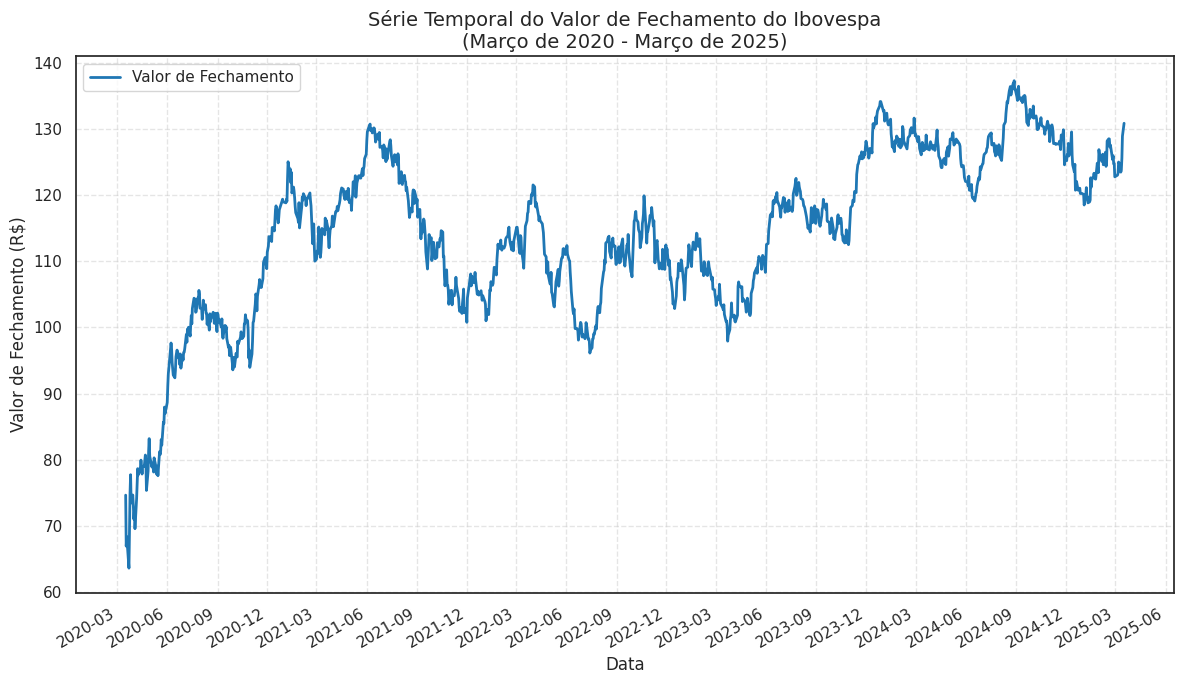

In [ ]:
#Plotando um gráfico com a série temporal do valor de fechamento da Ibovesp de 2020 a 2025
plt.figure(figsize=(12, 7))
plt.plot(df['Data'], df['Último'], label='Valor de Fechamento', color='#1f77b4', linewidth=2)

#Melhorando a formatação do eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()  #Rotacionando as datas para melhor visualização

plt.title('Série Temporal do Valor de Fechamento do Ibovespa\n(Março de 2020 - Março de 2025)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor de Fechamento (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


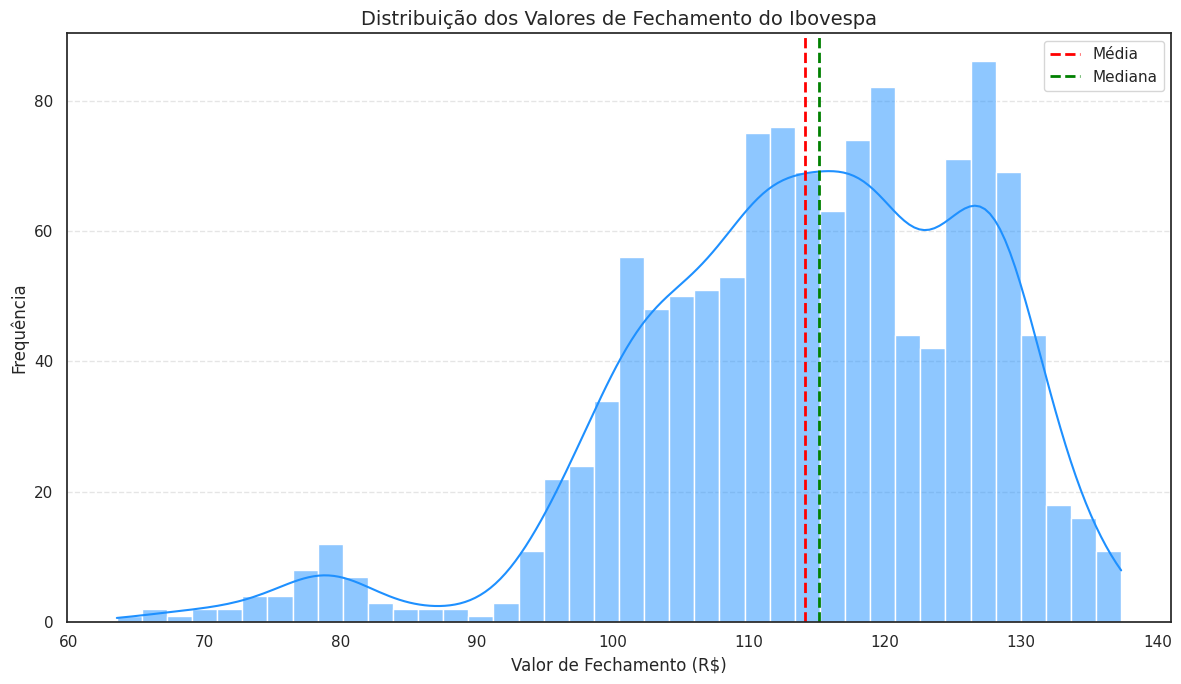

In [ ]:
#Plotando gráfico com a distruição dos valores de fechamento da Ibovespa
plt.figure(figsize=(12, 7))

# Histograma com densidade (KDE)
sns.histplot(df['Último'], bins=40, kde=True, color='dodgerblue', edgecolor='white')

# Adicionando linhas para média e mediana
plt.axvline(df['Último'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
plt.axvline(df['Último'].median(), color='green', linestyle='--', linewidth=2, label='Mediana')

plt.title('Distribuição dos Valores de Fechamento do Ibovespa', fontsize=14)
plt.xlabel('Valor de Fechamento (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#Criando uma cópia do dataframe
df_ibovespa = df.copy()
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2025-03-17,130.901,128.959,131.313,128.957,"9,96M","1,51%"
1,2025-03-14,128.957,125.647,129.194,125.647,"14,57B","2,64%"
2,2025-03-13,125.637,123.863,125.774,123.590,"11,26B","1,43%"
3,2025-03-12,123.864,123.507,124.048,122.969,"8,25B","0,29%"
4,2025-03-11,123.507,124.519,124.625,122.636,"8,81B","-0,81%"


In [ ]:
#Resentando o index do novo dataframe e aplicando decomposição sazonal da série temporal
df_ibovespa = df_ibovespa.reset_index()

resultados = seasonal_decompose(df_ibovespa['Último'], model='multiplicative', period=30)

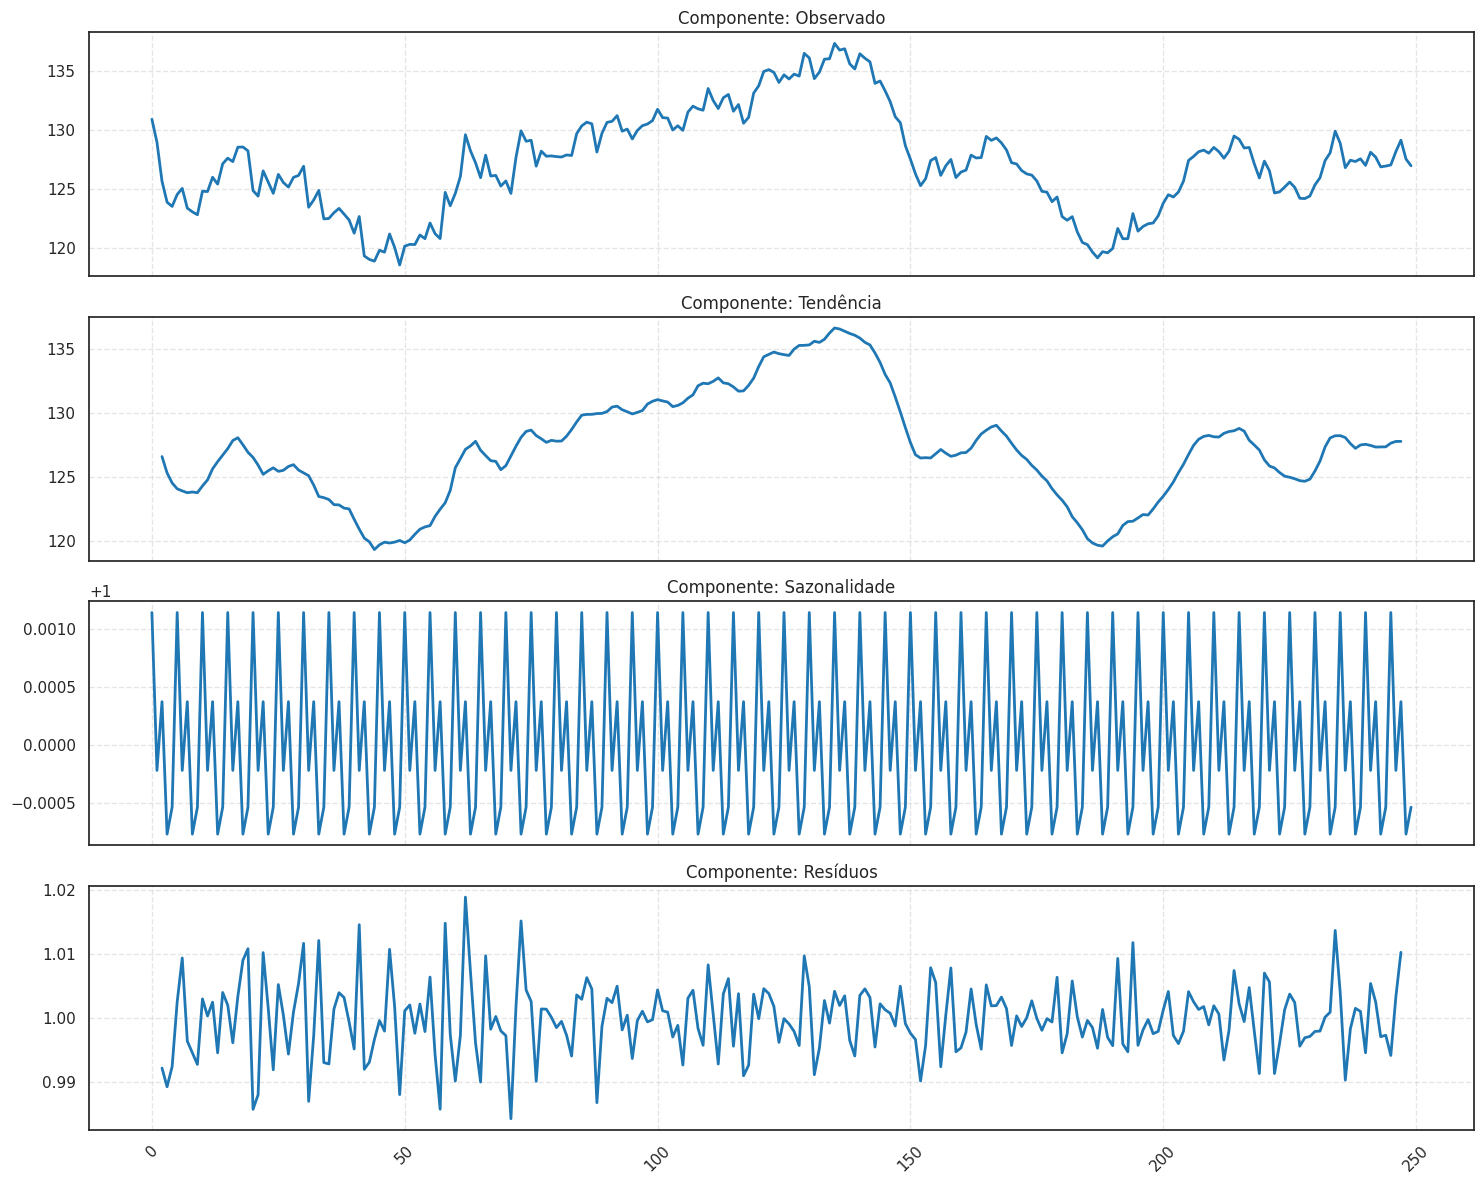

In [ ]:
#Filtrandos os dados de visualizando, está sendo exibido apenas dados do último ano para uma melhor visualização
filtered_df = df[df['Data'] > '2024-03-17']

#Realizando a decomposição sazonal
resultados = seasonal_decompose(filtered_df['Último'], model='multiplicative', period=5)

#Plotandos os gráficos
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

#Alterando o estilo
componentes = {
    'Observado': resultados.observed,
    'Tendência': resultados.trend,
    'Sazonalidade': resultados.seasonal,
    'Resíduos': resultados.resid
}
cores = ['#1f77b4', '#1f77b4', '#1f77b4', '#1f77b4']

#Plotando o gráfico de cada decomposição de série temporal
for ax, (titulo, dados), cor in zip(axes, componentes.items(), cores):
    dados.plot(ax=ax, color=cor, linewidth=2)
    ax.set_title(f'Componente: {titulo}', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

#Ajustando datas e layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Método Holdout/Train-Test Split

In [ ]:
#Criando a vairável Target
df['Target'] = df['Último'].shift(-1)

In [ ]:
df = df.dropna()

In [ ]:
#Defenindo quais colunas serão usadas como features
features = ['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']
X = df[features]
y = df['Target']

In [ ]:
# Convertendo o volume para numérico (removendo 'M' e 'B' e convertendo para float) e substituindo vírgula por ponto como separador decimal
X['Vol.'] = X['Vol.'].str.replace(',', '.', regex=False)
#Removendo caracteres não numéricos, exceto ponto e 'e' para notação científica
X['Vol.'] = X['Vol.'].str.replace(r'[^\d\.eE]', '', regex=True)
#Aplicando a substituição de 'M' e 'B' e convertendo para float
X['Vol.'] = X['Vol.'].replace({'M': '*1e6', 'B': '*1e9'}, regex=True).map(pd.eval).astype(float)

<ipython-input-221-7bc2d919146a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vol.'] = X['Vol.'].str.replace(',', '.', regex=False)
<ipython-input-221-7bc2d919146a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vol.'] = X['Vol.'].str.replace(r'[^\d\.eE]', '', regex=True)
<ipython-input-221-7bc2d919146a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
#Convertendo a variação percentual para numérico (removendo o '%' e convertendo para float)
X['Var%'] = X['Var%'].str.replace(',', '.', regex=False).str.rstrip('%').astype('float') / 100.0

<ipython-input-222-1bc9cfe45158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Var%'] = X['Var%'].str.replace(',', '.', regex=False).str.rstrip('%').astype('float') / 100.0


In [ ]:
#Verificando as primeiras linhas das features
print(X.head())

    Último  Abertura   Máxima   Mínima   Vol.    Var%
0  130.901   128.959  131.313  128.957   9.96  0.0151
1  128.957   125.647  129.194  125.647  14.57  0.0264
2  125.637   123.863  125.774  123.590  11.26  0.0143
3  123.864   123.507  124.048  122.969   8.25  0.0029
4  123.507   124.519  124.625  122.636   8.81 -0.0081


In [ ]:
#Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Verificando o tamanho de treino e test
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 995
Tamanho do conjunto de teste: 249


In [ ]:
#Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

#Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Quadrático Médio (MSE): 5.393598712807313e-05
Coeficiente de Determinação (R²): 0.9999996960244064


#Método ARIMA

In [ ]:
#Criando uma cópia do DF original
df_arima = df.copy()

#Ajustando o index e removendo colunas que não serão utéis
df_arima['Data'] = pd.to_datetime(df_ibovespa['Data'])
df_arima.set_index('Data', inplace=True)
df_arima.drop(columns=['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%', 'Target'], inplace=True)
df_arima.head()

,Último
Data,
2025-03-17,130.901
2025-03-14,128.957
2025-03-13,125.637
2025-03-12,123.864
2025-03-11,123.507


In [ ]:
# Realizando o teste de estacionariedade (Dickey-Fuller)
resultado_arima = adfuller(df_arima['Último'])
print('Estatística ADF:', resultado_arima[0])
print('p-valor:', resultado_arima[1])
print('Valores Críticos:', resultado_arima[4])


Estatística ADF: -0.15174315963512902
p-valor: 0.9440345584603512
Valores Críticos: {'1%': np.float64(-3.4356260602190356), '5%': np.float64(-2.863869899335344), '10%': np.float64(-2.5680104683371323)}


In [ ]:
#Verificando se a série é estacionária - Se p-valor > 0.05, a série não é estacionária
if resultado_arima[1] > 0.05:
    print("A série não é estacionária. Aplicando diferenciação.")
    df_arima['Último_diff'] = df_arima['Último'].diff().dropna()  # Diferenciar e remover NaNs
else:
    print("A série é estacionária.")

A série não é estacionária. Aplicando diferenciação.


In [ ]:
#Verificando o tamanho das séries
print(f"Tamanho da série original: {len(df_arima['Último'])}")
print(f"Tamanho da série diferenciada: {len(df_arima['Último_diff'])}")


Tamanho da série original: 1244
Tamanho da série diferenciada: 1244


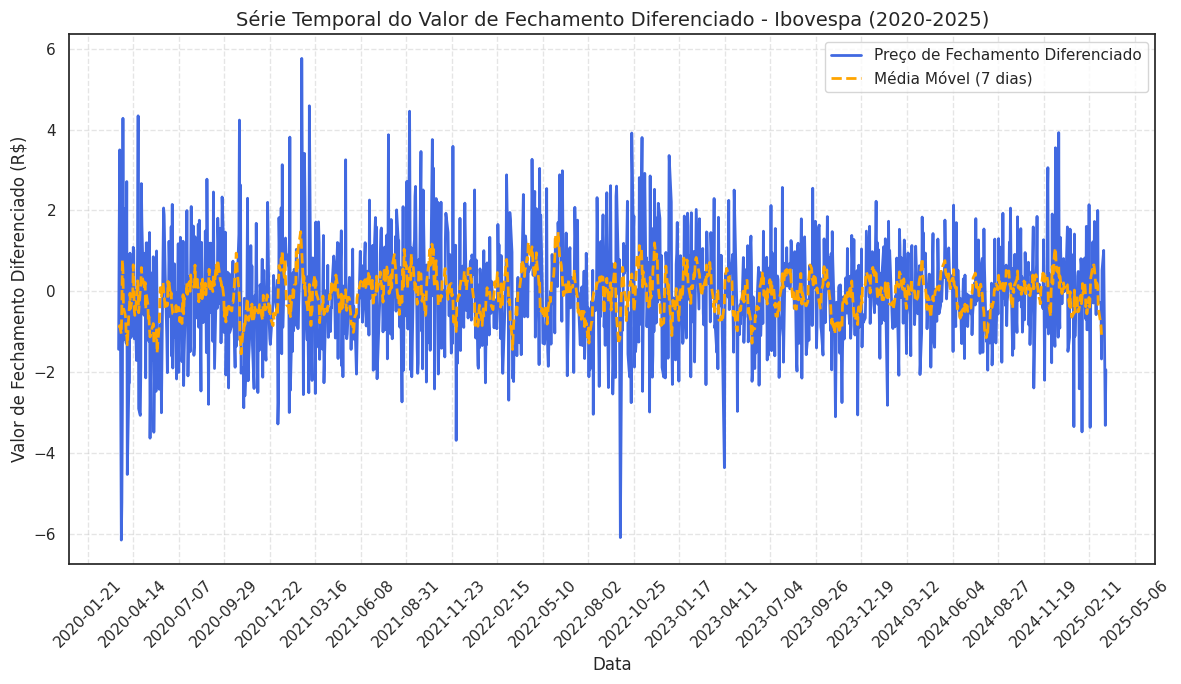

In [ ]:
#Plotando o gráfico com a Série Temporal do valor de fechamento da Ibovespa
plt.figure(figsize=(12, 7))

#Plotando o gráfico principal
plt.plot(df_arima.index, df_arima['Último_diff'], label='Preço de Fechamento Diferenciado',
         color='royalblue', linewidth=2)

#Plotando a média móvel para suavizar oscilações
plt.plot(df_arima.index, df_arima['Último_diff'].rolling(window=7).mean(),
         label='Média Móvel (7 dias)', color='orange', linewidth=2, linestyle='--')

#Realizando melhorias no eixo X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de data claro
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=12))  # Mostrar apenas a cada 2 semanas
plt.xticks(rotation=45)  # Rotacionar para melhor leitura

#Ajustando títulos e legendas
plt.title('Série Temporal do Valor de Fechamento Diferenciado - Ibovespa (2020-2025)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor de Fechamento Diferenciado (R$)', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#Dividindo os dados em treino e teste
train_size_arima = int(len(df) * 0.8)
train_arima, test_arima = df_arima['Último'][:train_size_arima], df_arima['Último'][train_size_arima:]

#Verificando o tamanho dos conjuntos
print(f"Tamanho do conjunto de treino: {len(train_arima)}")
print(f"Tamanho do conjunto de teste: {len(test_arima)}")

Tamanho do conjunto de treino: 995
Tamanho do conjunto de teste: 249


In [ ]:
#Criando e treinando o modelo ARIMA
model = ARIMA(train_arima, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [ ]:
#Fazendo previsões no conjunto de teste
predictions_arima = model_fit.forecast(steps=len(test_arima))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
#Avaliando o modelo
mse = mean_squared_error(test_arima, predictions_arima)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 411.7777235776098


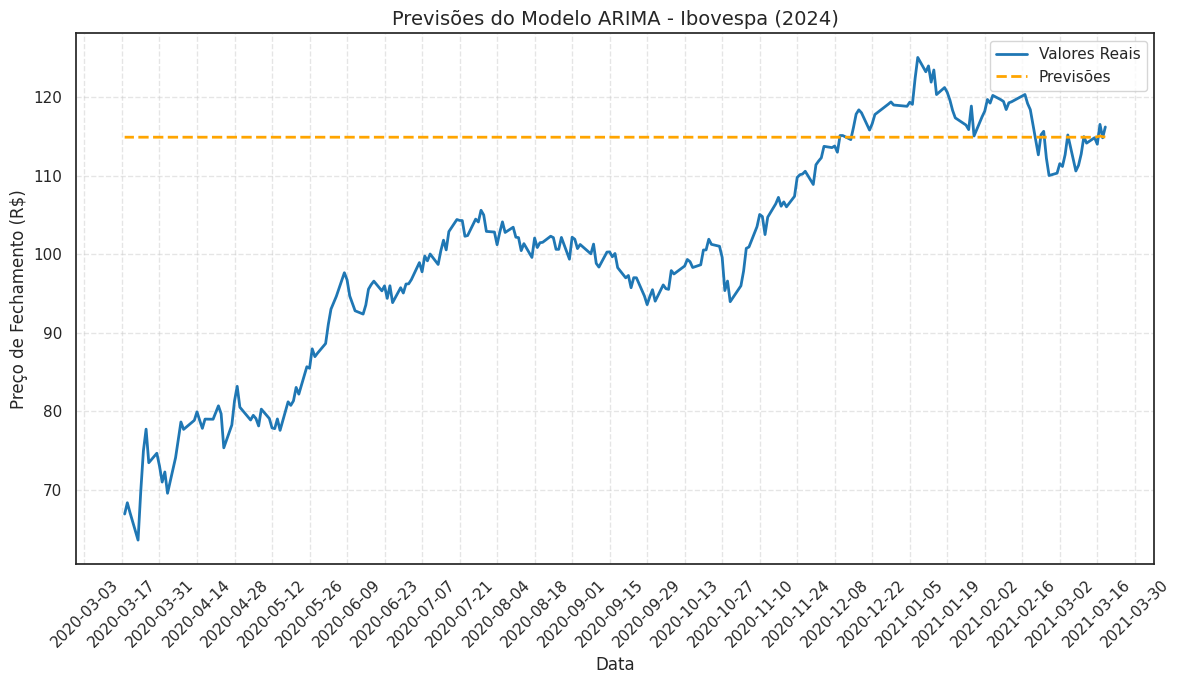

In [ ]:
#Plotando o gráfico
plt.figure(figsize=(12, 7))

#Apresentando os valores reais
plt.plot(test_arima.index, test_arima, label='Valores Reais', color='#1f77b4', linewidth=2)

#Apresentando previsões destacadas
plt.plot(test_arima.index, predictions_arima, label='Previsões', color='orange', linewidth=2, linestyle='--')

#Se houver intervalo de confiança disponível
if 'lower_bound' in locals() and 'upper_bound' in locals():
    plt.fill_between(test_arima.index, lower_bound, upper_bound,#
                     color='orange', alpha=0.2, label='Intervalo de Confiança')

#Realizando melhorias visuais
plt.title('Previsões do Modelo ARIMA - Ibovespa (2024)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (R$)', fontsize=12)

#Melhorarando o eixo X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#Realizando o teste ADF
resultado_adf = adfuller(df_arima['Último'].dropna())
print(f'P-valor do teste ADF: {resultado_adf[1]:.4f}')

#Aplica uma diferenciação na série para tentar torná-la estacionária
if resultado_adf[1] > 0.05:
    print("A série NÃO é estacionária. Aplicando diferenciação...")
    df_arima['Último_diff'] = df_arima['Último'].diff().dropna()


P-valor do teste ADF: 0.9440
A série NÃO é estacionária. Aplicando diferenciação...


In [ ]:
#Avaliando se o modelo perfomou bem
if mse < 1000:  # Ajuste o valor conforme necessário
    print("O modelo atingiu uma acurácia adequada (MSE < 1000).")
else:
    print("O modelo não atingiu uma acurácia adequada (MSE >= 1000).")

O modelo atingiu uma acurácia adequada (MSE < 1000).


# Phophet

In [ ]:
#Criando uma cópia do Dataframe original
df_prophet = df.copy()
df_prophet.drop(columns=['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%', 'Target'], inplace=True)
df_prophet.head()

,Data,Último
0,2025-03-17,130.901
1,2025-03-14,128.957
2,2025-03-13,125.637
3,2025-03-12,123.864
4,2025-03-11,123.507


In [ ]:
#Alterando o nome das colunas
df_prophet.columns = ['ds', 'y']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdayofay/vcmc3b8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzdayofay/ept4vbzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75686', 'data', 'file=/tmp/tmpzdayofay/vcmc3b8p.json', 'init=/tmp/tmpzdayofay/ept4vbzw.json', 'output', 'file=/tmp/tmpzdayofay/prophet_modelsli_sf0a/prophet_model-20250322210602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:06:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


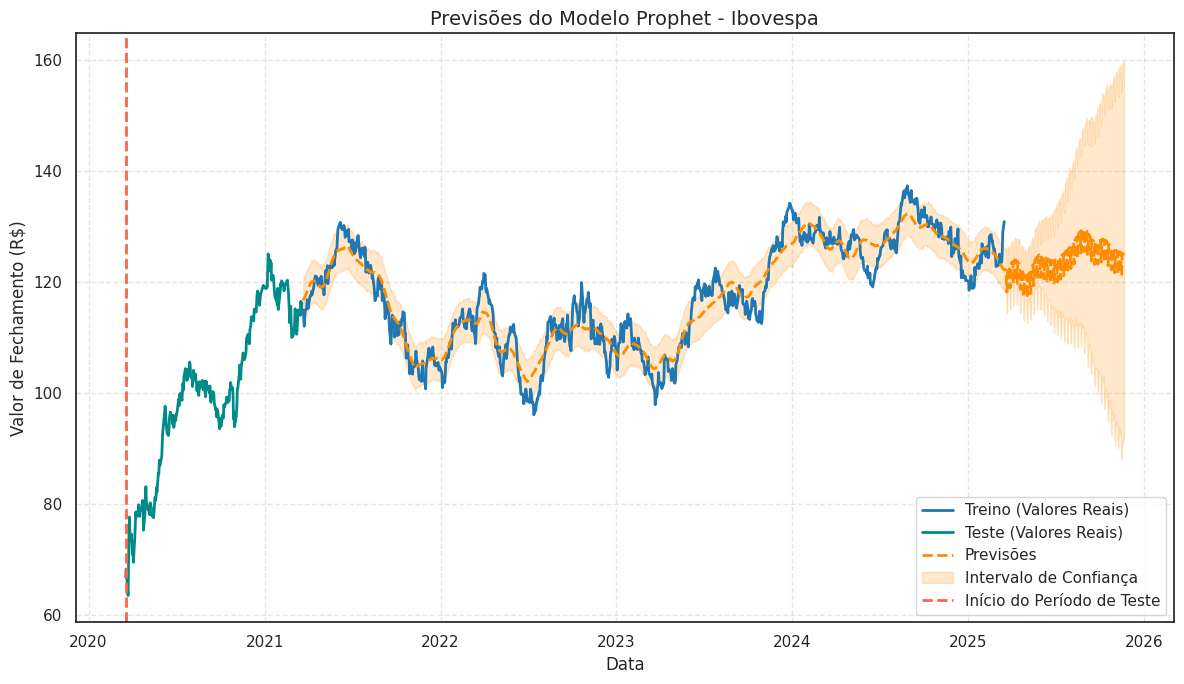

In [ ]:
train_size_prophet = int(len(df_prophet) * 0.8)
train_prophet, test_prophet = df_prophet.iloc[:train_size_prophet], df_prophet.iloc[train_size_prophet:]

#Criando e treinando o modelo
model = Prophet()
model.fit(train_prophet)

#Realizando as previsões
future = model.make_future_dataframe(periods=len(test_prophet))
forecast = model.predict(future)

#Avaliando o modelo
y_true = test_prophet['y'].values
y_pred = forecast['yhat'].values[-len(test_prophet):]

#Melhorando o gráfico
fig, ax = plt.subplots(figsize=(12, 7))

#Plotando os dados reais (treino e teste separados)
ax.plot(train_prophet['ds'], train_prophet['y'], label='Treino (Valores Reais)', color='#1f77b4', linewidth=2)
ax.plot(test_prophet['ds'], test_prophet['y'], label='Teste (Valores Reais)', color='#008B8B', linewidth=2)

#Realizando previsões e intervalo de confiança
ax.plot(forecast['ds'], forecast['yhat'], label='Previsões', color='#FF8C00', linewidth=2, linestyle='--')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                color='#FF8C00', alpha=0.2, label='Intervalo de Confiança')

#Destaque visual para a divisão treino/teste
ax.axvline(test_prophet['ds'].min(), color='#FF6347', linestyle='--', linewidth=2, label='Início do Período de Teste')

#Realizando Melhorias visuais
ax.set_title('Previsões do Modelo Prophet - Ibovespa', fontsize=14)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Valor de Fechamento (R$)', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

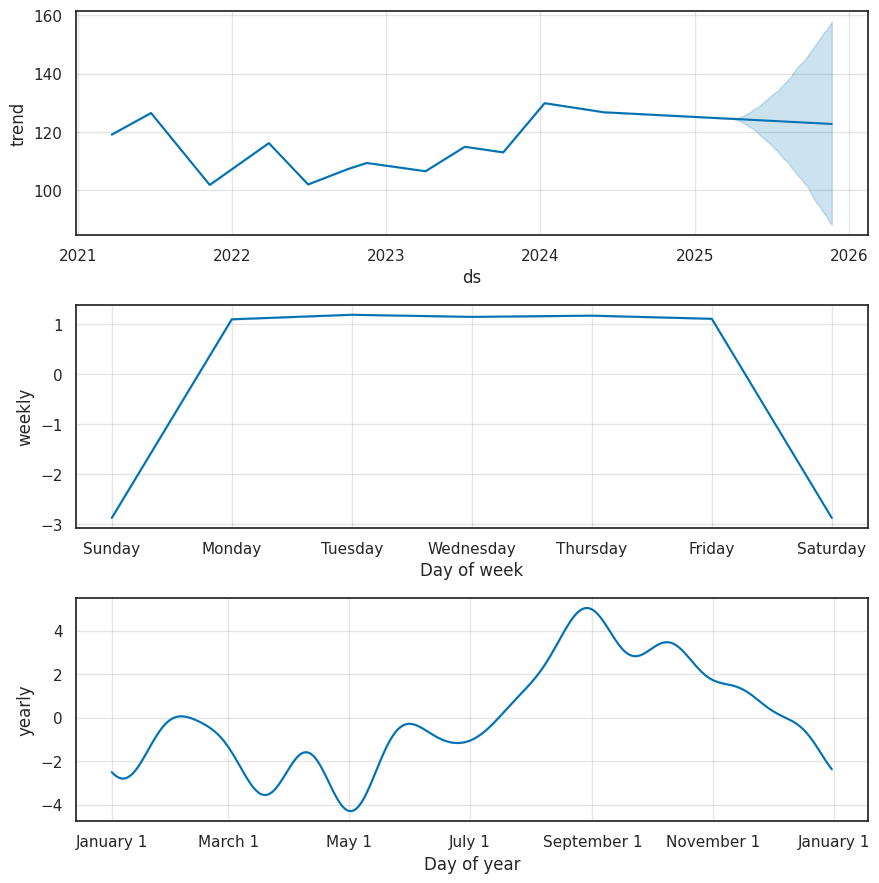

In [ ]:
#Plotando gráfico com subplots mostrando componentes da previsão
fig2 = model.plot_components(forecast)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error

#Função para calcular o MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculando o MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

#Calculando o MAPE
mape = calculate_mape(y_true, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Error (MAE): 24.100157339957633
Mean Absolute Percentage Error (MAPE): 26.89%


# Conclusão

Ao aplicar os três modelos, Regressão Linear, ARIMA e Phophet, é possível observar que os três modelos se comportaram de maneira adequada. Importante ressaltar que o ARIMA também apresentou um bom desempenho, mas a visualização com o Phophet possui mais informações utéis para a tomada de decisões. A regressão Linear, apesar de simples, pode ser util para análises rápidas, mas não consegue capturar a complexidade de séries temporais financeiras.

Apesar de com Regressão Linear tenha sido apresentado métricas com erros menores, através do Método Phophet foi possível obter um resultado superior em termos de visualização, interpretação e previsões futuras da série temporal.

O gráfico gerado com Phophet é mais completo, informado e útil para a tomada de decisões. Além disso apresentou um MAE de 24.1, MAPE de 26.89% considerado adequado e com uma acurácia de 73.11%

Portando, considerando a qualidade da visualização e a capacidade de modelar padrões, o Phophet foi escolhido como o melhor modelo para esse caso.